# Gumbel-Softmax

In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.tri as tri

from functools import reduce
from operator import mul
from scipy.special import softmax

## Основные функции

In [2]:
def draw_pdf_level_lines(dist, nlevels=10, subdiv=8, **kwargs):
    uniform_refiner = tri.UniformTriRefiner(triangle)
    points = uniform_refiner.refine_triangulation(subdiv=subdiv)
    pvals = []
    for xy in zip(points.x, points.y):
        pvals.append(dist.pdf(cartesian2baricentric(xy)))
    plt.tricontourf(points, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 1)    
    plt.axis('off')

In [3]:
corner = np.array([[0, 0], [0, 1], [0.5 * np.sqrt(3), 0.5]])
triangle = tri.Triangulation(corner[:, 0], corner[:, 1])

In [4]:
median_ends = [(corner[1] + corner[2]) / 2.0,
               (corner[2] + corner[0]) / 2.0,
               (corner[0] + corner[1]) / 2.0]

def cartesian2baricentric(xy, tol=0.001): 
    return np.clip([(corner[0] - median_ends[0]).dot(xy - median_ends[0]) * 4.0 / 3,
                    (corner[1] - median_ends[1]).dot(xy - median_ends[1]) * 4.0 / 3,
                    (corner[2] - median_ends[2]).dot(xy - median_ends[2]) * 4.0 / 3
                   ], tol, 1.0 - tol)

## Распределение Дирихле

In [5]:
class Dirichlet:
    def __init__(self, parameters):
        self._alpha = np.array(parameters)
        self._coef = math.gamma(np.sum(self._alpha)) / reduce(mul, [math.gamma(a) for a in self._alpha])
    def pdf(self, x):
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa) in zip(x, self._alpha)])

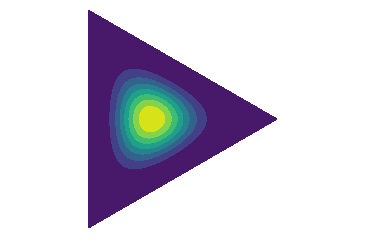

In [6]:
dist = Dirichlet([5, 5, 5])
draw_pdf_level_lines(dist)

# Gumbel-Softmax

In [7]:
class GumbelSoftmax:
    def __init__(self, s=1, tau=1):
        """
        :param s: int, lenth for array --- probability of classes
        :param tau: float > 0 --- temperature
        :return: array with the shape s --- probability to each classes from gumbel softmax distribution
        """
        self.probs = np.array(s)
        self.tau = tau
        self.num_classes = len(self.probs)
        self.coef = math.gamma(self.num_classes) * (self.tau ** (self.num_classes - 1)) * (reduce(mul, self.probs))
        
    def pdf(self, x):
        x = np.array(x)
        return self.coef * (self.probs * (x ** (-self.tau))).sum() ** \
                        (-self.num_classes) * reduce(mul, x ** (-self.tau - 1))
    
    def __call__(self, size=None):
        k = len(s)
        if size is None:
            return softmax(s + np.random.gumbel(size = k))
        else:
            return [softmax(s + np.random.gumbel(size = k)) for _ in range(size)]

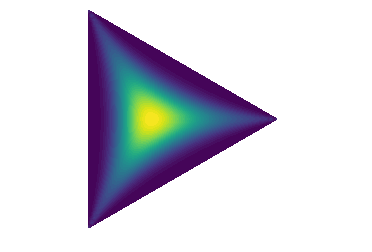

In [8]:
dist = GumbelSoftmax([15, 15, 15], 2)
draw_pdf_level_lines(dist, nlevels=50, subdiv=6)

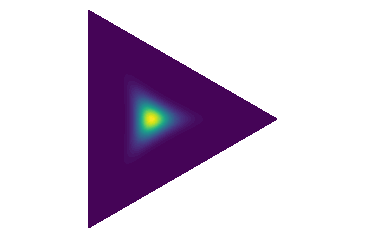

In [9]:
dist = GumbelSoftmax([15, 15, 15], 5)
draw_pdf_level_lines(dist, nlevels=50, subdiv=6)

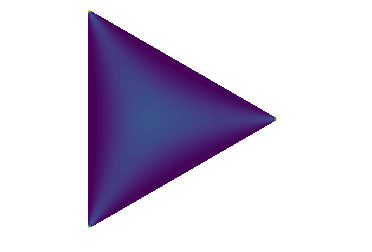

In [10]:
dist = GumbelSoftmax([15, 15, 15], 1.5)
draw_pdf_level_lines(dist, nlevels=50, subdiv=6)

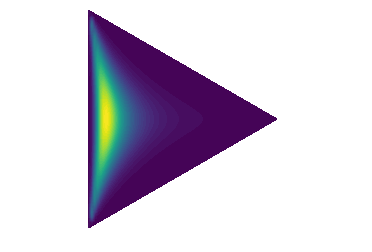

In [11]:
dist = GumbelSoftmax([15, 15, 1], 2)
draw_pdf_level_lines(dist, nlevels=50, subdiv=6)

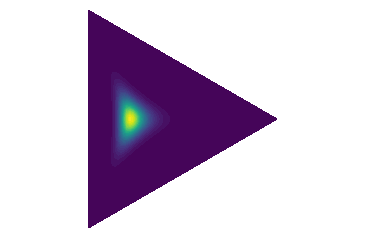

In [12]:
dist = GumbelSoftmax([15, 15, 1], 5)
draw_pdf_level_lines(dist, nlevels=50, subdiv=6)

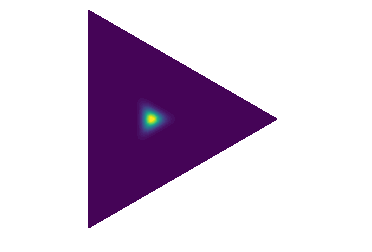

In [14]:
dist = GumbelSoftmax([15, 15, 15], 10)
draw_pdf_level_lines(dist, nlevels=50, subdiv=6)